# Mathematik für Biologiestudierende II

Sommersemester 2025

10.06.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Themen

* Lineare Modelle 
* Formulierung des Modells
* Interpratation der Ausgabe
* Korrelationskoeffizienten
* Mehrere erklärende Variablen

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# Lineare Modelle

* eine lineare Funktion einer Variablen ist eine Funktion der Form
$$   y = m \cdot x + b
$$
* bei der linearen Regression besteht die Aufgabe darin, $m$ und $b$ zu bestimmen

Das Konzept des linearen Modells erweitert dieses Verfahren in doppelter Hinsicht

* Konfidenzintervalle für $m$ und $b$ werden bestimmt
* die Zielvariable $y$ kann von mehr als einer Größe abhängen

* Literatur: "Linear Models with Python" von Faraway
* Statsmodels: https://www.statsmodels.org/stable/user-guide.html

Wir beginnen mit den Blutdruckdaten

In [2]:
df = pd.read_csv("blutdruckdaten.csv")
df.head()

,Alter,Blutdruck,Größe
0,17,110.0,165.3
1,19,125.0,180.0
2,21,118.0,177.8
3,23,119.0,173.3
4,25,125.0,173.5


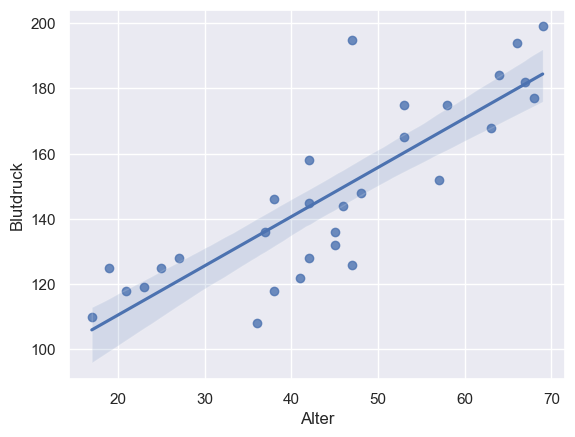

In [3]:
sns.regplot(df, x='Alter', y='Blutdruck');

# Formulierung des Modells

In [4]:
import statsmodels.formula.api as smf

In [5]:
formel = 'Blutdruck ~ Alter'

Das bedeutet:

* wir wollen den Blutdruck modellieren
* der Blutdruck ist die *abhängige Variable* (engl.  dependent)
* das Alter ist die *erklärende Variable*

In [6]:
modell = smf.ols(formel, df)

* `ols`: ordinary least squares
* Lektion 22: die Regression ist "bestmöglich" in dem Sinn, dass
$$
    \sum_{j=1}^n (m \cdot x_j + b - y_j)^2 
$$
minimal wird
* daher der Name "Methode der kleinsten Quadrate"  (engl. "lest squares")

In [7]:
res = modell.fit()

# Interpretation der Ausgabe

In [8]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           8.17e-09
Time:                        11:46:20   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Ich werde die wichtigsten Daten aus dieser Ausgabe erkären
* aber nicht alle

* in der ersten Zeile steht der Name der abhängigen Variablen

zum Vergleich:  wir hatten in Lektion 20 die lineare Regression zu Fuß gerechnet und für die Steigung den folgenden Wert erhalten:

In [9]:
cov = 348.57
var_x = 231.13
m = cov / var_x
np.round(m, 4)

1.5081

* Das ist genau die Zahl, die in der Spalte `coef` der Zeile `Alter` steht

* Der Wert für den Ordinatenabschnitt (engl: "intercept") war damals

In [10]:
xq = 44.800  # Mittelwert für x
yq = 147.93  # Mittelwert für y
b = yq - m*xq
np.round(b, 4)

80.3666

* Das ist die Zahl, die in der Spalte `coef` und der Zeile `Intercept` steht
* es gibt eine kleine Abweichung durch Rundungsfehler

Wir schauen uns die Zeile `Alter` weiter an:

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           8.17e-09
Time:                        11:46:20   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Der Eintrag `P>|t|` bezeichnet den p-Wert für den zweiseitigen Test, dass `coef` ungleich 0 ist.
* In der Zeile "Alter" ist `coef` ist die Steigung der linearen Regression, also das $m$ 

* wenn die Nullhypothese $H_0=\{m\ne0\}$ nicht abgelehnt werden kann, dann bedeutet das, dass zum Signifikanzniveau $\alpha=0.05$ nicht nachgewiesen wurde, dass das Alter überhaupt einen Einfluss auf den Blutdruck hat

* Der Eintrag `t` ist der Wert der Teststatistik, aus dem der p-Wert bestimmt worden ist

# Konfidenzintervalle für die Koeffizienten

In [12]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           8.17e-09
Time:                        11:46:20   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Die Einträge `[0.025` und `0.975]` geben die untere und die obere Vertrauensgrenze des Konfidenzintervalls zum Konfidenzniveau 0.95 für die Steigung an

* Variante:  99%-Konfidenzintervall
* Achtung:  Für Konfidenzintervall zum Konfidenzniveau $1-\alpha$ muss $\alpha$ eingegeben werden

In [13]:
res.conf_int(alpha=.01)

,0,1
Intercept,56.058844,104.680629
Alter,0.993358,2.022874


* Der Wert für $m$ in der Formel für die lineare Regression liegt mit 99% Sicherheit zwischen 0.993 und 2.02

# Korrelationskoeffizienten

In Lektion 23 hatten wir den Korrelationskoeffizienten bestimmt

In [14]:
r = 0.83705

In [15]:
np.round(r**2, 3)

0.701

In [16]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Blutdruck   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     65.54
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           8.17e-09
Time:                        11:46:20   Log-Likelihood:                -123.27
No. Observations:                  30   AIC:                             250.5
Df Residuals:                      28   BIC:                             253.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.3697      8.798      9.135      0.000      62.348      98.391
Alter          1.5081      0.186      8.096      0.000       1.127       1.890
==============================================================================
Omnibus:                        2.886   Durbin-Watson:                   2.401
Prob(Omnibus):                  0.236   Jarque-Bera (JB):                1.526
Skew:                           0.390   Prob(JB):                        0.466
Kurtosis:                       3.782   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* $r^2$ ist die Größe, die in `res.summary()` als `R-squared` auftaucht

# Anderes Beispiel: Größen von Vätern und Söhnen

In [17]:
df = pd.read_csv('galton.csv')
df.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,001,78.5,67.0,75.43,4,1,male,73.2
1,002,75.5,66.5,73.66,4,1,male,73.5
2,002,75.5,66.5,73.66,4,2,male,72.5
3,003,75.0,64.0,72.06,2,1,male,71.0
4,004,75.0,64.0,72.06,5,1,male,70.5


In [18]:
formel = 'childHeight ~ mother'

In [19]:
modell = smf.ols(formel, df)

In [20]:
res = modell.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     55.80
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           3.84e-13
Time:                        11:46:20   Log-Likelihood:                -1119.5
No. Observations:                 481   AIC:                             2243.
Df Residuals:                     479   BIC:                             2251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.8580      3.132     14.644      0.000      39.705      52.011
mother         0.3651      0.049      7.470      0.000       0.269       0.461
==============================================================================
Omnibus:                        3.813   Durbin-Watson:                   1.353
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.794
Skew:                          -0.144   Prob(JB):                        0.150
Kurtosis:                       3.326   Cond. No.                     1.77e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Die Regressionsgerade ist

>  childHeight = 0.3651 * mother + 45.8580

# Mehrere erklärende Variablen

### Lineares Modell mit einer erklärten und mehreren erklärenden Variablen

$$
   y = m_1 \cdot x_1 + m_2 \cdot x_2 + \dots + m_n \cdot x_n + b
$$

$y$ ist die abhängige und die $x_i$ sind die erklärenden Variablen

Beispiel:  Körpergröße der Söhne hängt von der Körpergröße von Vater und Mutter ab

In [21]:
formel = 'childHeight ~ father + mother'

Diese Formel hat 3 Unbekannte:

* den Koeffizienten von `father`
* den Koeffizienten von `mother`
* den Ordinatenabschnitt

In [22]:
modell = smf.ols(formel, df)

In [23]:
res = modell.fit()

In [24]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     74.62
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           6.25e-29
Time:                        11:46:20   Log-Likelihood:                -1080.7
No. Observations:                 481   AIC:                             2167.
Df Residuals:                     478   BIC:                             2180.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.3128      4.095      4.716      0.000      11.266      27.359
father         0.4176      0.046      9.154      0.000       0.328       0.507
mother         0.3288      0.045      7.258      0.000       0.240       0.418
==============================================================================
Omnibus:                       10.653   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.542
Skew:                          -0.200   Prob(JB):                     0.000695
Kurtosis:                       3.752   Cond. No.                     3.69e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Regressiongleichung:  childHeight = 0.4176 * father + 0.3288 * mother + 19.3128
* alle drei Koeffizienten haben statistisch signifikanten Einfluss

* Der Wert für $r^2$ beträgt 0.238

* Für das Modell, bei dem die Größe des Kindes nur über die Größe der Mutter modelliert wird, beträgt der Wert von $r^2$ nur 0.104
* In dem Modell, welches die Körpergrößen beider Eltern berücksichtigt, ist die Korrelation höher

### Beispiel: Hinzufügung einer Variablen ohne Einfluss

In [25]:
df['Kontonummer'] = stats.randint(1, 999999).rvs(size=481)

In [26]:
formel = 'childHeight ~ father + mother + Kontonummer'
modell = smf.ols(formel, df)
res = modell.fit()

In [27]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     49.77
Date:                Sun, 08 Jun 2025   Prob (F-statistic):           5.31e-28
Time:                        11:46:20   Log-Likelihood:                -1080.5
No. Observations:                 481   AIC:                             2169.
Df Residuals:                     477   BIC:                             2186.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.1559      4.108      4.663      0.000      11.083      27.229
father          0.4176      0.046      9.150      0.000       0.328       0.507
mother          0.3295      0.045      7.266      0.000       0.240       0.419
Kontonummer  1.992e-07    3.7e-07      0.538      0.591   -5.28e-07    9.27e-07
==============================================================================
Omnibus:                       10.547   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.366
Skew:                          -0.198   Prob(JB):                     0.000759
Kurtosis:                       3.748   Cond. No.                     2.28e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""